# Librerías

In [1]:
import numpy as np #para manejar arreglos
from matplotlib import pyplot as plt #para graficar

plt.rcParams["figure.figsize"] = (10,5) #tamaño de los gráficos: ancho x alto

from scipy.integrate import solve_ivp
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

---
# `solve_ivp` para sistemas de ecuaciones diferenciales
## Utiliza un método como los que vimos (por defecto usa Runge-Kutta).


## Ejemplo:

$$
\begin{cases}
x_1'&= -0.5x_1+0.02x_1x_2\\
x_2' &= x_2-0.02x_1x_2\\
x_1(0)&=4 \\
x_2(0) &= 20
\end{cases}
$$

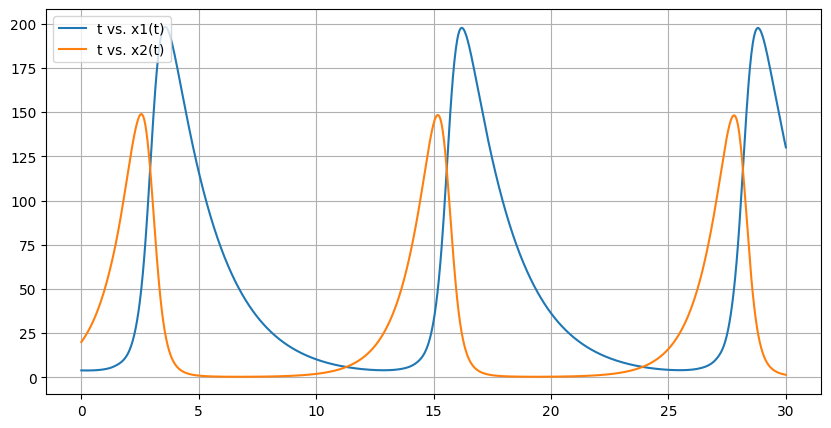

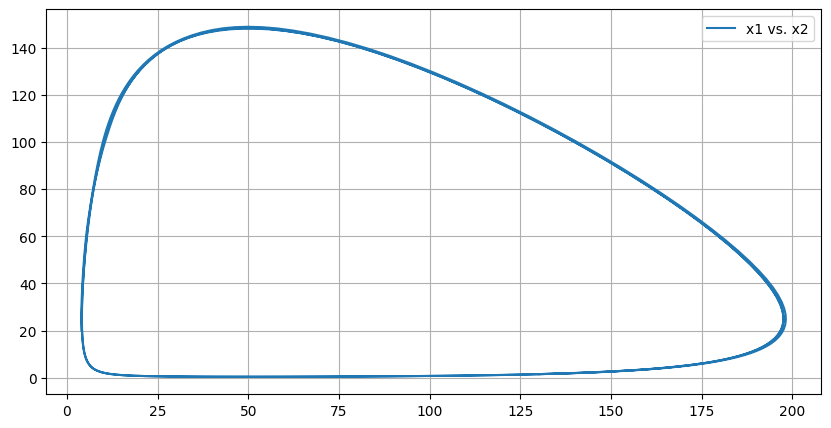

In [ ]:
def func(t,z): #ojo z es un vector: así lo necesita solve_ivp
    x1 = z[0]
    x2 = z[1]
    f1 = -0.5*x1 + 0.02*x1*x2
    f2 = x2 - 0.02*x1*x2
    f = [f1,f2] #así lo necesita solve_ivp
    return f


# intervalo de tiempo: experimentar cambiando!
t0 = 0
tf = 30

# condiciones iniciales: experimentar cambiando!
x1_0 = 4
x2_0 = 20
z0 = [x1_0, x2_0] #así lo necesita solve_ivp

# resuelvo el sistema por solve_ivp
solucion = solve_ivp(func, [t0, tf], z0, dense_output=True)

vals_t = np.linspace(t0,tf,1000)  # para que evalúe la solución en muchos puntos
vals_sol = solucion.sol(vals_t)

# grafico t vs. x(t)
plt.plot(vals_t, vals_sol[0], label="t vs. x1(t)") #el [0] es para que devuelva solamente valores de x1

# grafico t vs. y(t)
plt.plot(vals_t, vals_sol[1], label="t vs. x2(t)") #el [1] es para que devuelva solamente valores de x2
plt.legend()
plt.grid() #marcas horizontales y verticales de refencia
plt.show() #muestra los gráficos hasta el momento


# grafico retrato fase (o diagrama de fases): x vs y
plt.plot(vals_sol[0], vals_sol[1], label="x1 vs. x2")
plt.legend()
plt.grid() #marcas horizontales y verticales de refencia